# Network-Intrusion Detection System - Regression Analysis
This notebook demonstrates a complete workflow for regression analysis using a IDS-related dataset. The steps include data cleaning, exploratory data analysis (EDA), data preprocessing, feature selection, principal component analysis (PCA), model training, and model evaluation. We will use Linear Regression, Support Vector Machine (SVM), Decision Tree, and Random Forest models and compare their performance.

# Import necessary packages

In [53]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data

In [4]:
data = pd.read_csv('dataset.csv')

# Initial Data Exploration

In [4]:
# check first few values
data.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


In [5]:
# check last few values
data.tail()


,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121
181,50000,40,80,400,128


In [6]:
# check dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   Number of Barriers      182 non-null    int64
dtypes: int64(5)
memory usage: 7.2 KB


In [8]:
# check dataset shape
data.shape

(182, 5)

In [10]:
# check dataset columns and statistics
print(data.columns)
data.describe()

Index(['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes',
       'Number of Barriers'],
      dtype='object')


,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


# Data Preparation

## Data Cleaning
Data cleaning ensures that the dataset is free from errors and inconsistencies, which can negatively affect model performance. In this step, we check for missing values and duplicates.

In [11]:
# check for null values
data.isnull().sum()

Area                      0
Sensing Range             0
Transmission Range        0
Number of Sensor nodes    0
Number of Barriers        0
dtype: int64

In [14]:
# check for duplicate values
print("No. of duplicated datas: ",data.duplicated().sum())

No. of duplicated datas:  0


In [15]:
# remove duplicate datas if necessary
data = data.drop_duplicates()

In [34]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)  # to drop rows with NaNs
data.fillna(0, inplace=True)

## Outliers Detection and Handling
Outliers can significantly impact the performance of regression models. We will use box plots to visualize outliers for each feature and the target variable.

Box plots are used to visualize the distribution of data and identify potential outliers. Outliers are data points that are significantly different from other observations and can be identified as points outside the "whiskers" of the box plot.

### Using BoxPlot

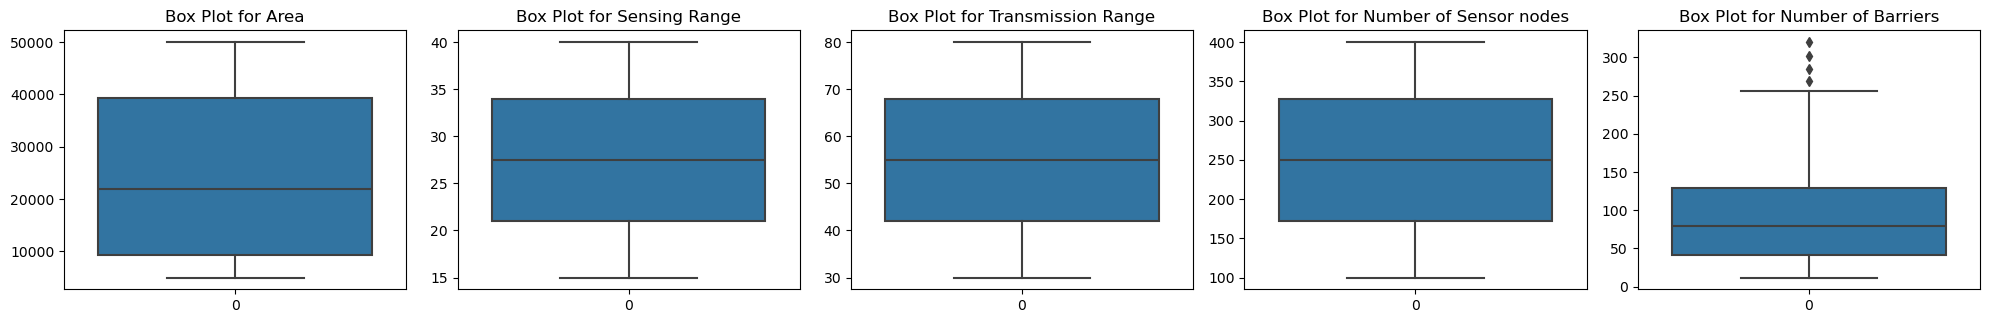

In [19]:
# detecting no. of outliers
plot.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plot.subplot(5,5,i+1)
    sb.boxplot(data[column])
    plot.title(f"Box Plot for {column}")
plot.tight_layout()
plot.show()

In [20]:
# handling outliers
# Here, four outliers are detected only in 'Number of Barriers'

# removing outliers based on IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print("Data shape before removing outliers:", data.shape)
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data shape after removing outliers:", data.shape)


Data shape before removing outliers: (182, 5)
Data shape after removing outliers: (178, 5)


# Exploratory Data Analysis (EDA)
EDA involves visualizing and summarizing the main characteristics of the dataset. Pair plots help visualize the relationships between pairs of features and the target variable, providing insights into potential correlations. The correlation matrix shows the linear relationships between all pairs of features and the target variable, helping identify which features are most strongly related to the target.

## Pairplot

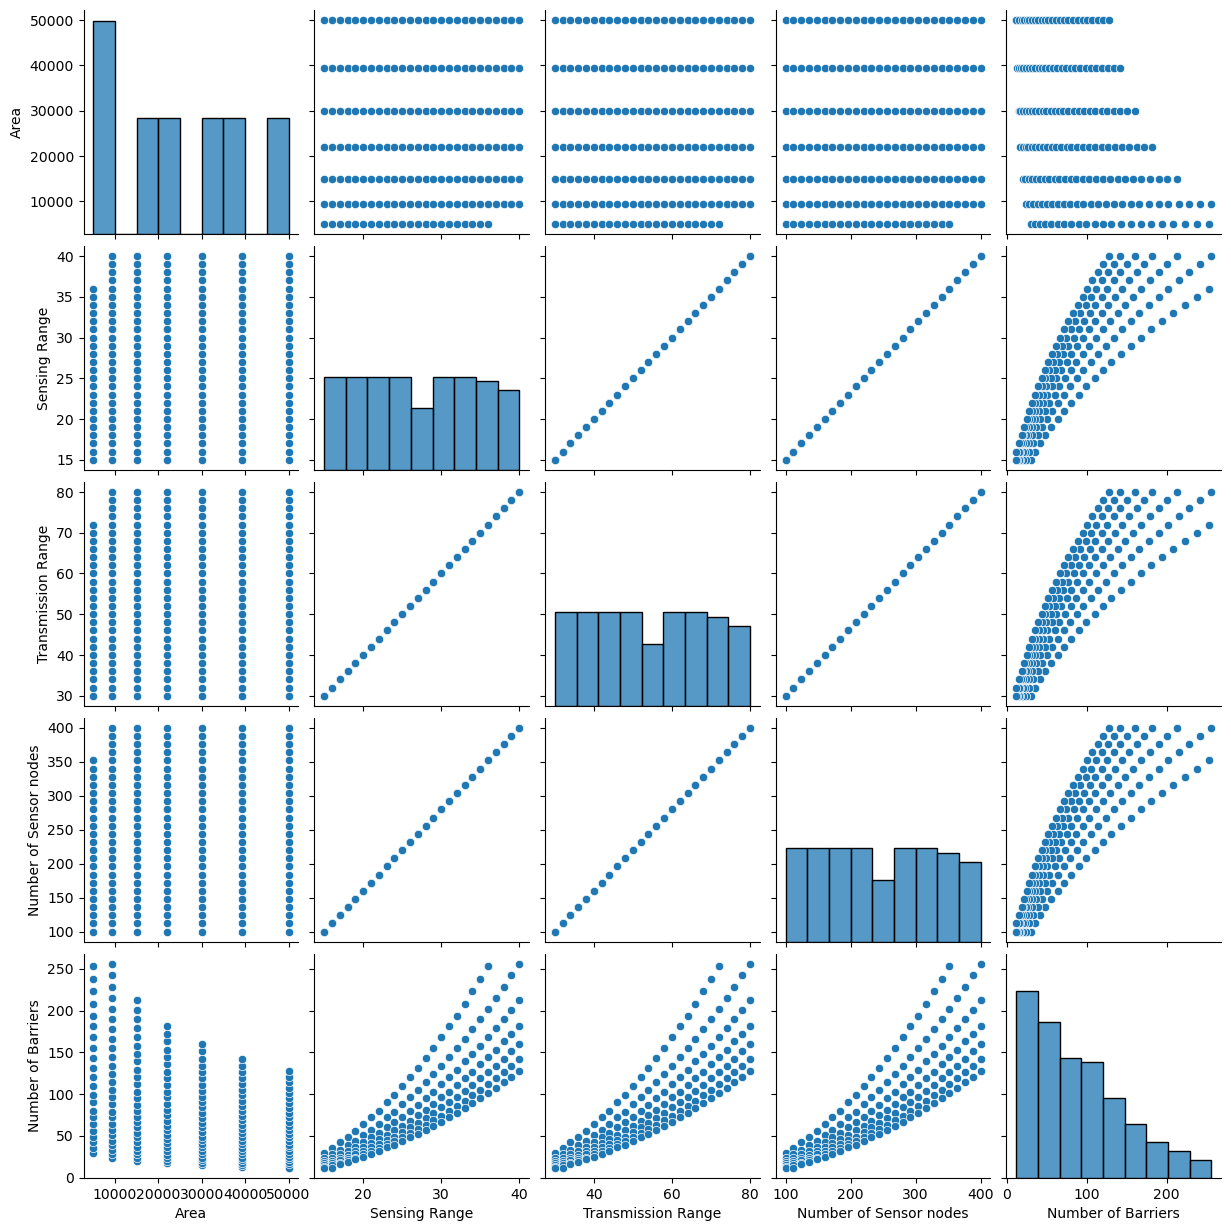

In [44]:
# to visualize the relationship between features and target variable
sb.pairplot(data)
plot.show()

## Histogram

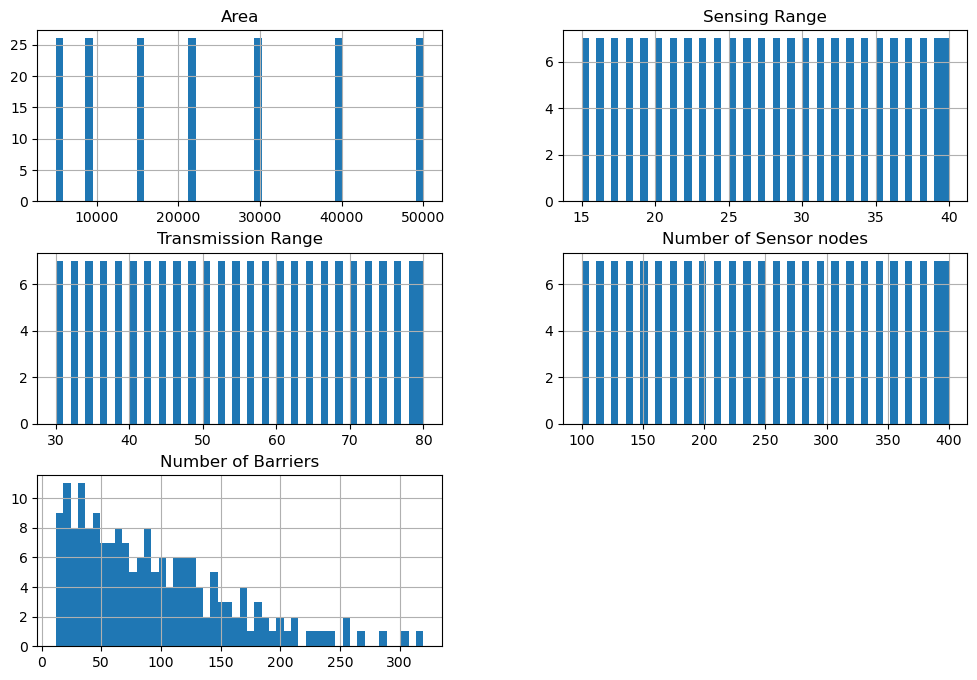

In [64]:
# to see the distribution of the variables
data.hist(bins=50, figsize=(12,8))
plot.show()

## Correlation Heatmap

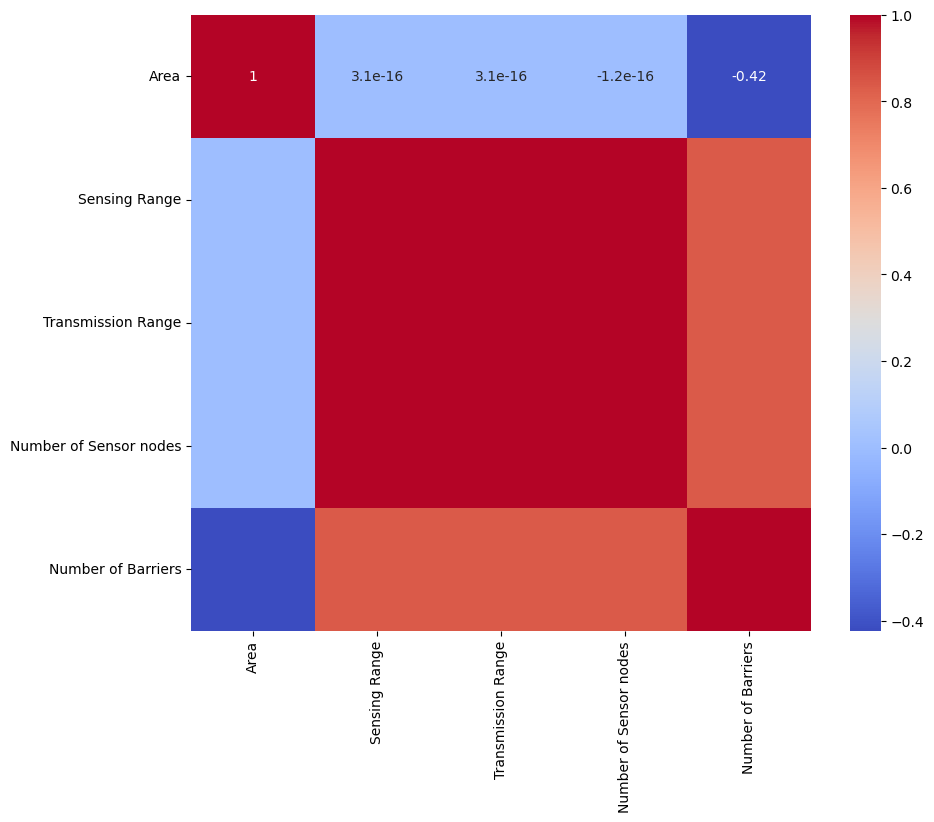

In [13]:
plot.figure(figsize=(10, 8))
sb.heatmap(data.corr(), annot=True, cmap='coolwarm')
plot.show()

## Scatter Plot

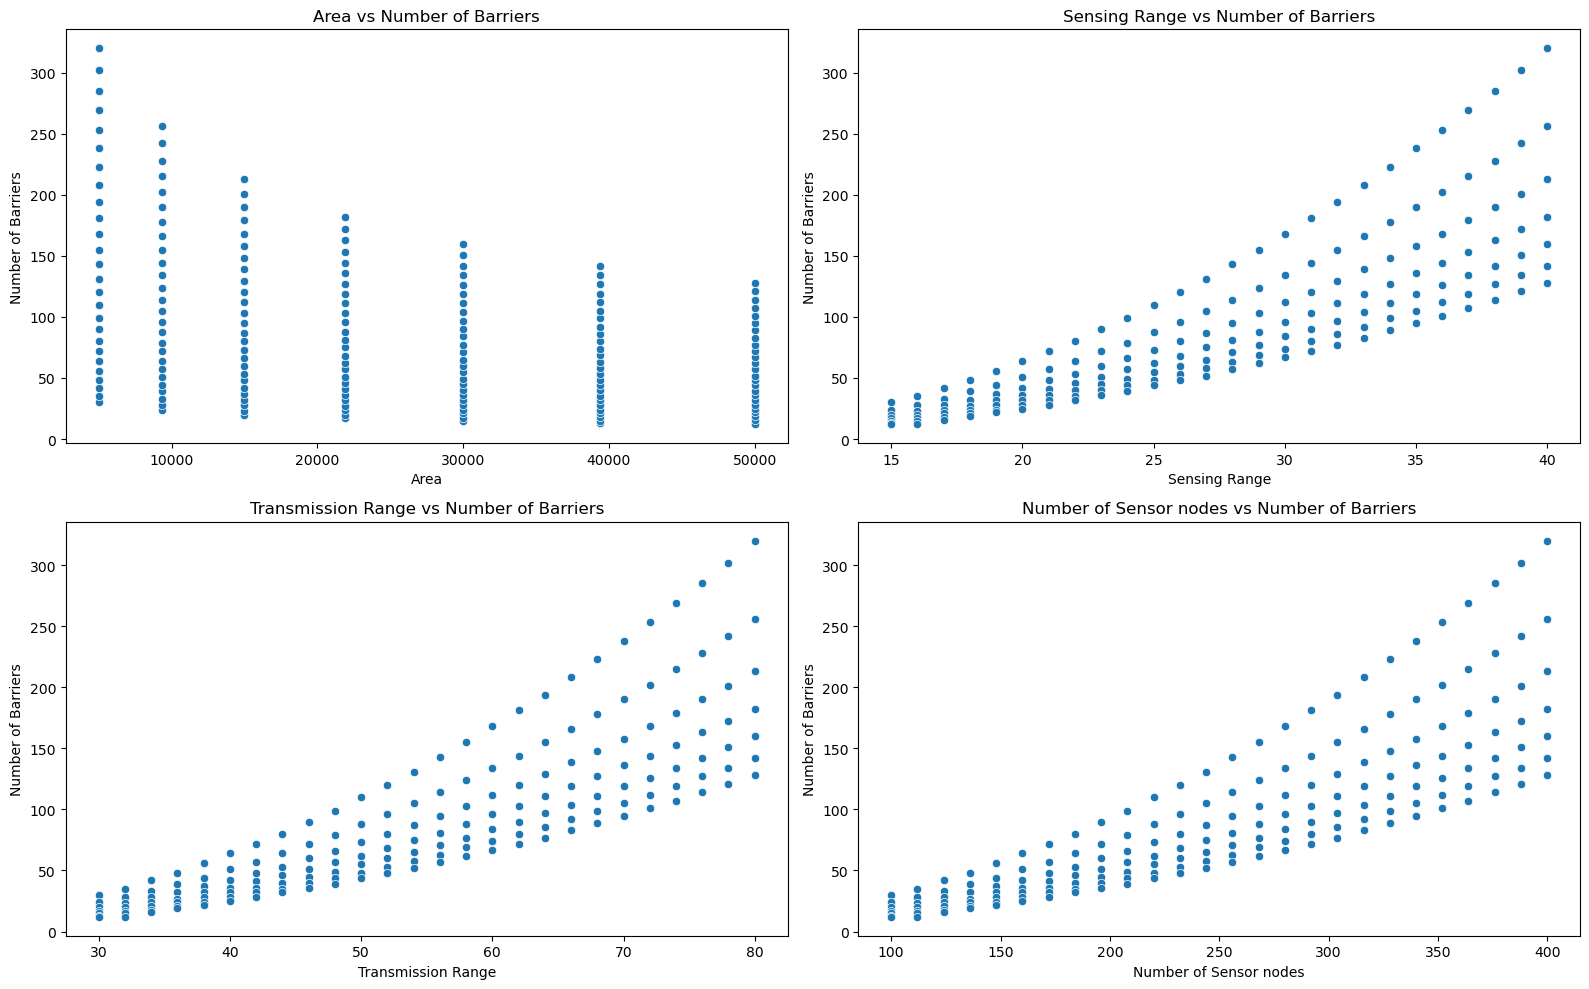

In [65]:
plot.figure(figsize=(16, 10))

# Scatter plot: Area vs Sensing Range
plot.subplot(2, 2, 1)
sb.scatterplot(x='Area', y='Number of Barriers', data=data)
plot.title('Area vs Number of Barriers')

# Scatter plot: Area vs Transmission Range
plot.subplot(2, 2, 2)
sb.scatterplot(x='Sensing Range', y='Number of Barriers', data=data)
plot.title('Sensing Range vs Number of Barriers')

# Scatter plot: Area vs Number of Sensor nodes
plot.subplot(2, 2, 3)
sb.scatterplot(x='Transmission Range', y='Number of Barriers', data=data)
plot.title('Transmission Range vs Number of Barriers')

# Scatter plot: Area vs Number of Barriers
plot.subplot(2, 2, 4)
sb.scatterplot(x='Number of Sensor nodes', y='Number of Barriers', data=data)
plot.title('Number of Sensor nodes vs Number of Barriers')

plot.tight_layout()
plot.show()

# Preprocessing

## Data Scaling

In [67]:
# features
X = data.drop('Number of Barriers', axis=1)  

# target variable
y = data['Number of Barriers']  

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
X_train_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)


X_test_data = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_data.describe()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,4.287758e-17,2.128566e-16,2.128566e-16,-9.188053e-17
std,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.292946e+00,-1.559406e+00,-1.559406e+00,-1.559406e+00
25%,-1.007716e+00,-7.832713e-01,-7.832713e-01,-7.832713e-01
50%,-1.927756e-01,-1.364926e-01,-1.364926e-01,-1.364926e-01
75%,9.481414e-01,1.027709e+00,1.027709e+00,1.027709e+00
max,1.640841e+00,1.674488e+00,1.674488e+00,1.674488e+00


# Feature Selection
Feature selection helps identify the most important features in the dataset, reducing dimensionality and potentially improving model performance.

We can use the following techniques for feature selection:

    1. Correlation
    2. Feature Importances
    3. Principal Component Analysis

## Correlation

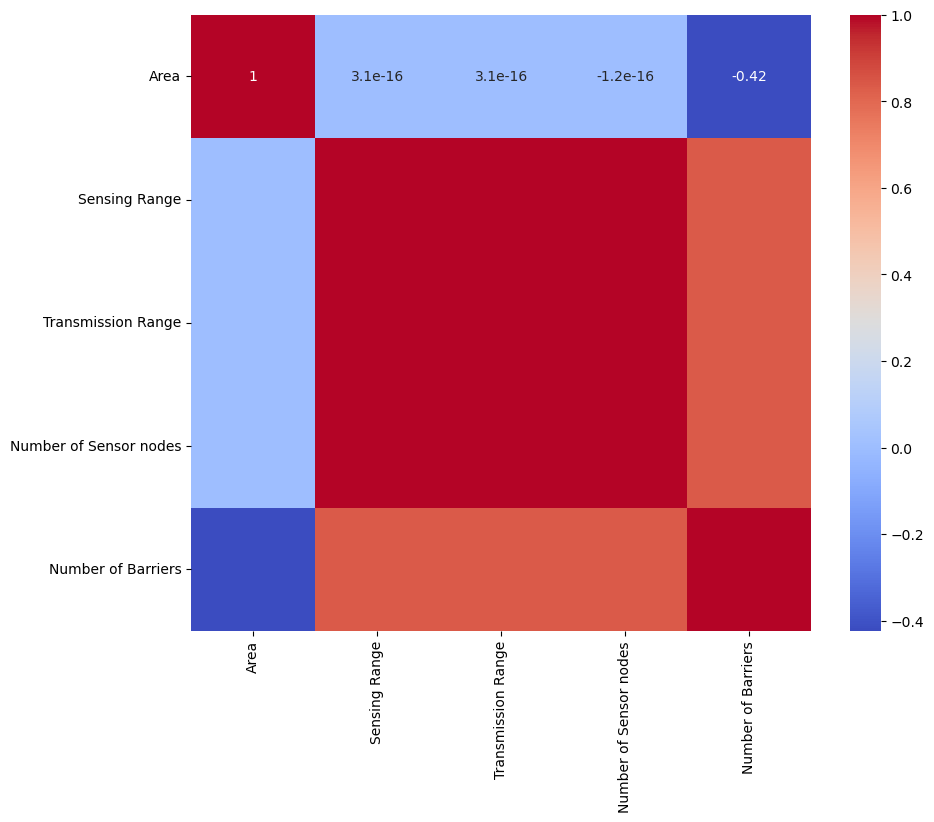

In [33]:
plot.figure(figsize=(10, 8))
sb.heatmap(data.corr(), annot=True, cmap='coolwarm')
plot.show()

In [34]:
data.corr()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
Area,1.000000e+00,3.095077e-16,3.095077e-16,-1.162999e-16,-0.423438
Sensing Range,3.095077e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Transmission Range,3.095077e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Number of Sensor nodes,-1.162999e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Number of Barriers,-4.234383e-01,8.383655e-01,8.383655e-01,8.383655e-01,1.000000


In [38]:
correlation_matrix = data.corr()
print("Correlation with target variable:\n", correlation_matrix['Number of Barriers'].sort_values(ascending=False))

# Select features with high correlation (above 0.5 or below -0.5 for simplicity)
selected_features = correlation_matrix['Number of Barriers'][np.abs(correlation_matrix['Number of Barriers']) > 0.5].index.drop('Number of Barriers')
print("Selected features based on correlation:\n", selected_features)

Correlation with target variable:
 Number of Barriers        1.000000
Sensing Range             0.838365
Transmission Range        0.838365
Number of Sensor nodes    0.838365
Area                     -0.423438
Name: Number of Barriers, dtype: float64
Selected features based on correlation:
 Index(['Sensing Range', 'Transmission Range', 'Number of Sensor nodes'], dtype='object')


## Feature Importance
This method ranks features based on their contribution to the model's predictive power. We train a Random Forest model and plot the feature importances to identify the most important features.

Features ranking:
                  Feature  Importance
1           Sensing Range    0.295780
2      Transmission Range    0.253806
0                    Area    0.234371
3  Number of Sensor nodes    0.216043


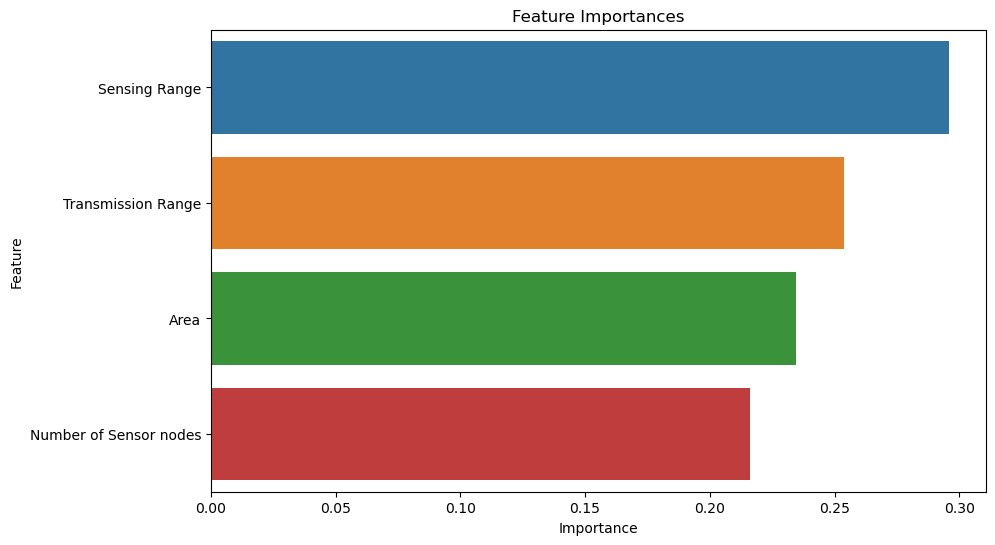

In [31]:
# training a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# extracting feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# sorting the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# features with ranking values
top_n = 4
top_n_features = feature_importances.head(top_n)
print("Features ranking:")
print(top_n_features)

# plotting feature importances
plot.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importances)
plot.title('Feature Importances')
plot.show()

## Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique that transforms the original features into a smaller set of new features (principal components) that retain most of the variance in the data. This reduces the complexity of the dataset and can help improve model performance by eliminating noise and redundant information. The explained variance ratio indicates how much variance each principal component captures.

In [43]:
pca = PCA(n_components=4)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display variance ratio
pca.explained_variance_ratio_

array([7.50071223e-01, 2.49928777e-01, 2.64381210e-33, 6.32771714e-34])

# Model Training and Evaluation

Here, we train and evaluate the following four regression models:
1. Linear Regression
2. Support Vector Machine(SVM)
3. Decision Tree
4. Random Forest

Each model is trained on the PCA-transformed data and evaluated on the PCA-transformed test data.
We use four evaluation metrics to measure model performance:
- R² (coefficient of determination), 
- Mean Squared Error (MSE), 
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)

The best model is selected based on the highest R² core.score.

In [61]:
# list the models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_r2 = -float('inf') # initialize with minimum value

# initialize dictionary to store metrics
test_results={}

# train and test each model
for name, model in models.items():
    # train
    model.fit(X_train_pca, y_train)
    # predict
    y_pred = model.predict(X_test_pca)
    # evaluate
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    # making a list for each models
    test_results[name] = [r2, mse, rmse, mae]

    print(f"Model Name: {name}\nR^2: {r2}\nMSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\n")

    #check for best model based on r2
    if(r2 > best_r2):
        best_r2 = r2
        best_model = name

print(f"The best model based on the highest R^2 score is: {best_model} with {best_r2} score")

Model Name: Linear Regression
R^2: 0.8500298883330111
MSE: 634.1047435317644
RMSE: 25.181436486661447
MAE: 19.259098539588198

Model Name: Support Vector Machine
R^2: 0.29300225031087024
MSE: 2989.3331528594254
RMSE: 54.67479449306989
MAE: 32.001642253438305

Model Name: Decision Tree
R^2: 0.9691262687408784
MSE: 130.54054054054055
RMSE: 11.425433932264479
MAE: 9.837837837837839

Model Name: Random Forest
R^2: 0.9878325321124121
MSE: 51.44657837837838
RMSE: 7.172627020721096
MAE: 4.884864864864865

The best model based on the highest R^2 score is: Random Forest with 0.9878325321124121 score


Testing model performance metrics:
                               R2          MSE       RMSE        MAE
Linear Regression       0.850030   634.104744  25.181436  19.259099
Support Vector Machine  0.293002  2989.333153  54.674794  32.001642
Decision Tree           0.969126   130.540541  11.425434   9.837838
Random Forest           0.987833    51.446578   7.172627   4.884865


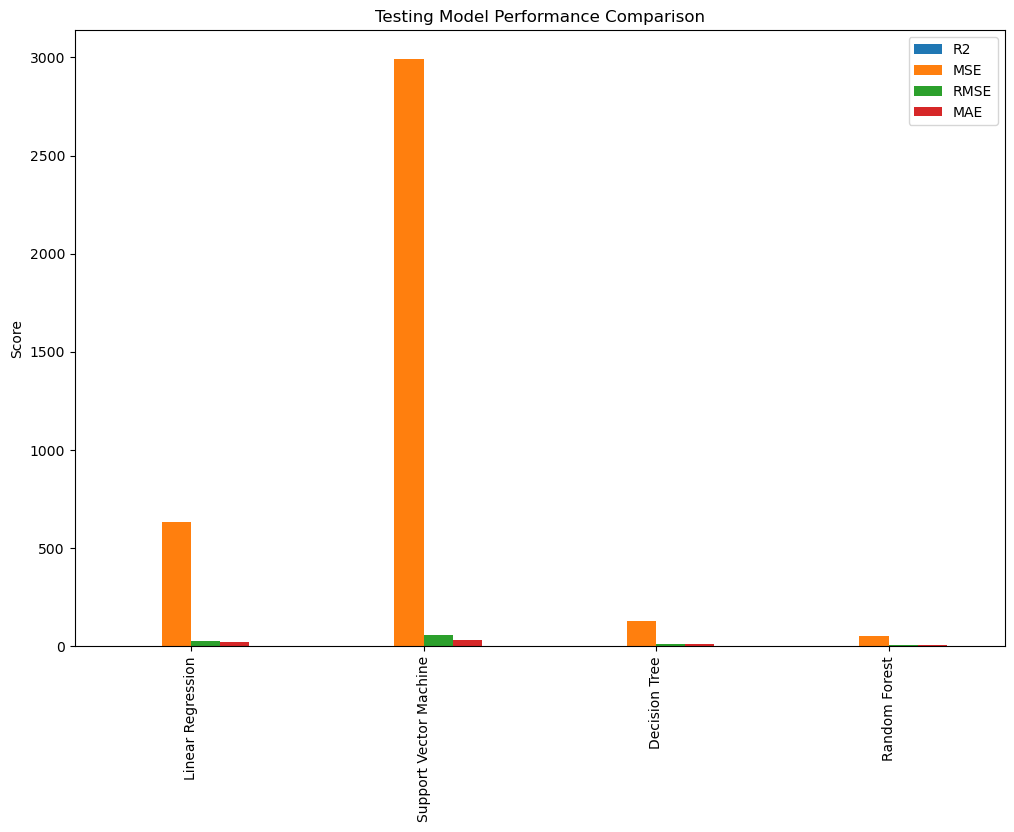

In [63]:
test_results_df = pd.DataFrame(test_results, index=['R2', 'MSE', 'RMSE', 'MAE']).T
print("Testing model performance metrics:\n", test_results_df)

# Plotting the testing results
test_results_df.plot(kind='bar', figsize=(12, 8))
plot.title('Testing Model Performance Comparison')
plot.ylabel('Score')
plot.show()

In [ ]:
# thus, Random Forest Model seems to be more suitable for such predictions